## 3 Machine Learning for Classification

#### We'll use logistic regression to predict churn

### 3.1 Churn Prediction Project

- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

### 3.2 Data Preparation

- Download the data, Read it in Pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if churn variable need any preparation

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [67]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [68]:
!wget $data -O data-week-3.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [69]:
df = pd.read_csv(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
df.columns = df.columns.str.lower().str.replace(' ', '-')

In [71]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '-')

In [72]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no-phone-service,no,no,no-phone-service,no
internetservice,dsl,dsl,dsl,dsl,fiber-optic
onlinesecurity,no,yes,yes,yes,no


In [73]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [74]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [75]:
df.totalcharges = df.totalcharges.fillna(0)

In [76]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [77]:
df.churn = (df.churn == 'yes').astype('int')

### 3.3 Setting up the validation Framework

- Perform the train/validation/test split with scikit-learn

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
df_full_train, df_test = train_test_split(df, test_size= 0.2,random_state=1)
df_train, df_val = train_test_split(df, test_size= 0.25,random_state=1)

In [80]:
len(df_train), len(df_test), len(df_val)

(5282, 1409, 1761)

In [81]:
df_train =df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [82]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [83]:
del df_train['churn']
del df_test['churn']
del df_val['churn']


### 3.4 EDA

- check missing values
- Look at the target variable (churn)
- Look at the categorical and numerical columns

In [84]:
df_full_train = df_full_train.reset_index(drop=True)

In [85]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [86]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [87]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [88]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [89]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines','internetservice', 'onlinesecurity', 'onlinebackup',
               'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies','contract', 'paperlessbilling', 'paymentmethod']

In [90]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature Importance: Churn rate and risk ratio

Feature importance analysis(part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

In [91]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no-internet-service,...,no-internet-service,no-internet-service,no-internet-service,no-internet-service,two-year,no,mailed-check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one-year,no,credit-card-(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two-year,no,bank-transfer-(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one-year,no,electronic-check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one-year,no,electronic-check,70.40,2044.75,0


In [92]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [93]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [94]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [95]:
global_churn - churn_female

np.float64(-0.006855983216553063)

In [96]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [97]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [98]:
global_churn  - churn_partner

np.float64(0.06493474245795922)

In [99]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [100]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

Risk Ratio

In [101]:
churn_partner / global_churn

np.float64(0.7594724924338315)

In [102]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

####  SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;

In [103]:
from IPython.display import display

In [104]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()
    

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no-phone-service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber-optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no-internet-service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no-internet-service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no-internet-service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no-internet-service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no-internet-service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no-internet-service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one-year,0.120573,1186,-0.149395,0.446621
two-year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank-transfer-(automatic),0.168171,1219,-0.101797,0.622928
credit-card-(automatic),0.164339,1217,-0.105630,0.608733
electronic-check,0.455890,1893,0.185922,1.688682
mailed-check,0.193870,1305,-0.076098,0.718121


### 3.6 Feature Importance: Mutual Information

Mutual informtion - concept from information theory, it tells us how much we can learn about one variable if we know the value of another
- https://en.wikipedia.org/wiki/Mutual_information

In [105]:
from sklearn.metrics import mutual_info_score

In [106]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [107]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [108]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [109]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [110]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [111]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### 3.7 Feature Importance : Correlation

How about numerical columns?
- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [112]:
df_full_train.tenure.max()

np.int64(72)

In [113]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [114]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [115]:
df_full_train[(df_full_train.tenure>2) &(df_full_train.tenure<= 12)].churn.mean()

np.float64(0.3994413407821229)

In [116]:
df_full_train[df_full_train.tenure> 12].churn.mean()

np.float64(0.17634908339788277)

In [117]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [118]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [119]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

### 3.8 One Hot Encoding

- Use scikit-Learn to encode categorical features

In [120]:
from sklearn.feature_extraction import DictVectorizer

In [121]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

### 3.9 Logistic Regression

- Binary Classification
- Linear vs logistic regression

In [122]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [123]:
z = np.linspace(-7, 7 ,51)

In [124]:
sigmoid(10000)

np.float64(1.0)

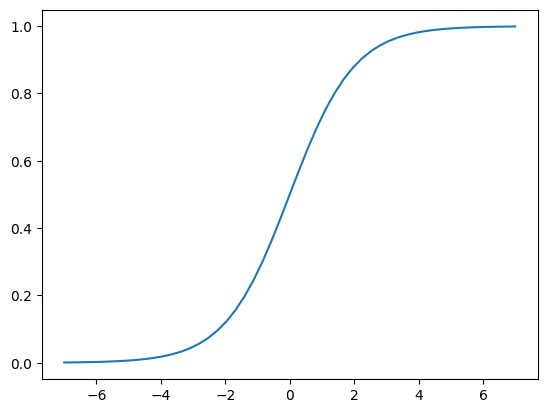

In [125]:
plt.plot(z, sigmoid(z))

In [126]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [127]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] *w[j]
    result = sigmoid(score)
    return result

### 3.10 Training Logistic Regression woth Scikit-Learn

- Training a model with scikit-learn
- Apply it to validation dataset
- Calculate the accuracy

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

C:\Users\AJAY\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [131]:
model_intercept_[0]

NameError: name 'model_intercept_' is not defined

In [132]:
model_coef_[0].round(3)

NameError: name 'model_coef_' is not defined

In [133]:
y_pred = model.predict_proba(X_val)[:,1]


In [134]:
churn_decision = (y_pred >= 0.5)

In [135]:
(y_val == churn_decision).mean()

np.float64(0.8120386144236229)

In [136]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [137]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [138]:
df_pred.correct.mean()

np.float64(0.8120386144236229)

In [139]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 0], shape=(1761,))

### 3.11 Model Interpretation
- Look at the coefficients
- Train a smaller model with fewer features

In [142]:
a = [1, 2, 3, 4]
b = 'abcd'

In [143]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [144]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.246),
 'contract=one-year': np.float64(-0.142),
 'contract=two-year': np.float64(-0.225),
 'dependents=no': np.float64(0.03),
 'dependents=yes': np.float64(-0.152),
 'deviceprotection=no': np.float64(0.066),
 'deviceprotection=no-internet-service': np.float64(-0.092),
 'deviceprotection=yes': np.float64(-0.097),
 'gender=female': np.float64(-0.067),
 'gender=male': np.float64(-0.055),
 'internetservice=dsl': np.float64(-0.288),
 'internetservice=fiber-optic': np.float64(0.258),
 'internetservice=no': np.float64(-0.092),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.235),
 'multiplelines=no-phone-service': np.float64(0.035),
 'multiplelines=yes': np.float64(0.078),
 'onlinebackup=no': np.float64(0.088),
 'onlinebackup=no-internet-service': np.float64(-0.092),
 'onlinebackup=yes': np.float64(-0.118),
 'onlinesecurity=no': np.float64(0.24),
 'onlinesecurity=no-internet-service': np.float64(-0.092),
 'onlinesecurity=yes': 

In [145]:
small = ['contract', 'tenure', 'monthlycharges']

In [146]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'one-year', 'tenure': 59, 'monthlycharges': 69.1},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 44.85},
 {'contract': 'month-to-month', 'tenure': 3, 'monthlycharges': 18.8},
 {'contract': 'month-to-month', 'tenure': 66, 'monthlycharges': 89.4},
 {'contract': 'month-to-month', 'tenure': 12, 'monthlycharges': 78.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 90.75},
 {'contract': 'month-to-month', 'tenure': 58, 'monthlycharges': 65.25},
 {'contract': 'month-to-month', 'tenure': 26, 'monthlycharges': 90.8},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 69.9},
 {'contract': 'one-year', 'tenure': 53, 'monthlycharges': 74.1}]

In [152]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [153]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [154]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one-year',
       'contract=two-year', 'monthlycharges', 'tenure'], dtype=object)

In [155]:
X_train_small = dv_small.transform(dicts_train_small)

In [156]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [157]:
w0 = model_small.intercept_[0]
w0

np.float64(-1.932876433419259)

In [158]:
w = model_small.coef_[0]
w.round(3)

array([ 0.317, -0.634, -1.576,  0.029, -0.037])

In [159]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.317),
 'contract=one-year': np.float64(-0.634),
 'contract=two-year': np.float64(-1.576),
 'monthlycharges': np.float64(0.029),
 'tenure': np.float64(-0.037)}

In [160]:
-1.93 + (-1.576) + 30 * 0.029 + 24 * (-0.037)

-3.524

In [161]:
sigmoid(_)

np.float64(0.028637018131856647)

### 3.12 Using the Model

In [162]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [163]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [164]:
y_full_train = df_full_train.churn.values

In [165]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

C:\Users\AJAY\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [166]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [167]:
X_test = dv.transform(dicts_test)

In [168]:
y_pred = model.predict_proba(X_test)[:, 1]

In [169]:
churn_decision = (y_pred >= 0.5)

In [170]:
(churn_decision == y_test).mean()

np.float64(0.8076650106458482)

In [171]:
y_test

array([0, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [172]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber-optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic-check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [173]:
X_small = dv.transform([customer])

In [174]:
model.predict_proba(X_small)[0, 1]

np.float64(0.6239875684169238)

In [175]:
y_test[-1]

np.int64(1)

### 3.14 Explore More

More things

- Try to exclude least useful features

Use scikit-learn in project of last week

- Re-implement train/val/test split using scikit-learn in the project from the last week
- Also, instead of our own linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized). Find the best regularization parameter for Ridge

Other projects

- Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
- Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
